## Optional stopping

The **Type 1 error rate** in behavioral research (the probability of saying there is an effect,
when there is no effect) is often set at 0.05. In recent years, researchers have become
increasingly aware of research practices that inflate the Type 1 error rate. This means that
the true Type 1 error rate is higher, or inflated, above the nominal Type 1 error rate set
by the researcher. 

Simmons, Nelson, and Simonsohn (2011) describe a number of
research practices that lead to a situation where researchers are likely to say **there is an
effect, when there is no effect** (i.e., make a Type 1 error) more than 5% of the time, in the
long run. In essence, all these practices have to do with **multiple comparisons** – looking
at your data multiple times, or performing a significance test for the same hypothesis in
several different ways.

In **optional stopping**, a researcher repeatedly analyzes the data, continues the data collection when the test result is not statistically significant,
but stops when a significant effect is observed. We will learn why optional stopping can
be efficient, but that you have to do it right, by controlling the Type 1 error rate.

### Plotting p-value over time

[1] 2.691641e-18

The lowest p-value was observed at sample size 1906The p-value dropped below 0.05 for the first time as sample size 31

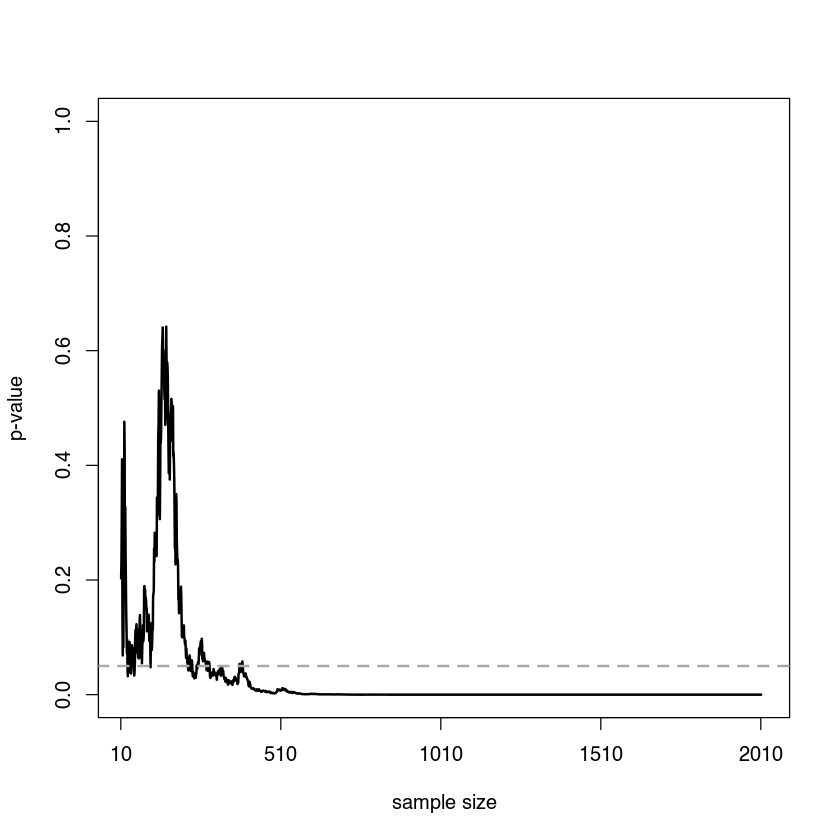

In [125]:
n<-2000 #total number of datapoints (per condition) you are willing to collect after initial 10

D<-0.3 #True effect size (Keep SD below to 1, otherwise, this is just mean dif, not d)
SD<-1 #Set True standard deviation.

p<-numeric(n) #store p-values
x<-numeric(n) #store x-values
y<-numeric(n) #store y-values

n<-n+10 #script calculates p-values after 10 people in each condition, so add 10 to number of datapoints

for(i in 10:n){ #for each simulated participants after the first 10
  x[i]<-rnorm(n = 1, mean = 0, sd = SD)
  y[i]<-rnorm(n = 1, mean = D, sd = SD)
  z<-t.test(x[1:i],y[1:i], var.equal=TRUE) #perform the t-test
  p[i]<-z$p.value 
}

p<-p[10:n] #Remove forst 10 empty p-values

#Create the plot
#png(file="p-value_over_time.png",width=4000,height=2000, , units = "px", res = 500)
plot(0, col="red", lty=1, lwd=3, ylim=c(0,1), xlim=c(10,n), type="l", xlab='sample size', ylab='p-value', cex.lab=1, cex.axis=1, xaxt = "n")
lines(p, lwd=2)
abline(h=0.05, col="darkgrey", lty=2, lwd=2) #draw ine at p = 0.05
axis(1, at=seq(0, n-10, by=(n-10)/4), labels = seq(10, n, by=(n-10)/4))
#dev.off()

min(p) #Return lowest p-value from all looks
cat("The lowest p-value was observed at sample size",which.min(p)+10) #Return the sample size at which the p-value was smallest
cat("The p-value dropped below 0.05 for the first time as sample size",which(p<0.05)[1]+10) #Return the sample size at which the p-value dropped below 0.05 for the first

#Š Daniel Lakens, 2016. 
# This work is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License. https://creativecommons.org/licenses/by-nc-sa/4.0/

**Effect size** expresses the strength of
the effect you are examining.

“With a large enough sample size, the p-value for
every simulation drops to zero (if there’s a true effect)."

### Optional stopping

In [ ]:
N<-100 #total number of datapoints (per condition) you are willing to collect
Looks<-2 #set number of looks at the data
nSim<-50000 #number of simulated studies
alpha<-0.05 #set alpha

D<-0 #True effect size (must be 0 when simulating Type 1 errors)

#Take care of some settings
options(scipen=100, digits=4) #disable scientific notation for numbers
LookN<-ceiling(seq(0,N,N/Looks)) #Determine at which N's to look
LookN<-LookN[-1] #remove look at 0
LookN<-LookN[LookN > 2] #Remove looks at N of 1 or 2 (not possible with t-test)
Looks<-length(LookN) #if looks are removed, change number of looks
matp<-matrix(NA, nrow=nSim, ncol=Looks) #Matrix for p-values at sequential tests
SigSeq<-numeric(Looks) #Variable to store final p-values
OptStop<-numeric(nSim) #variable to store positions of optional stopping
p<-numeric(nSim) #Variable to save optional stopping p-values

#Loop data generation for each study, then loop to perform a test for each N 
for (i in 1:nSim){
  x<-rnorm(n = N, mean = 0, sd = 1)
  y<-rnorm(n = N, mean = D, sd = 1)
  for (j in 1:Looks){
  matp[i,j]<-t.test(x[1:LookN[j]],y[1:LookN[j]], var.equal=TRUE)$p.value #perform the t-test, store
  }
  cat('Loop', i, 'of', nSim,'\n')
}

#Save Type 1 error rate for each look
for (i in 1:Looks){
  SigSeq[i] <- sum(matp[,i]<alpha)
}

#Get the positions at which are stopped, and then these p-values
for (i in 1:nSim){
  OptStop[i] <- min(which(matp[i,]<alpha))
}
OptStop[is.infinite(OptStop)] <- Looks #If nothing significant, take last p-value (fixes error warning)
for (i in 1:nSim){
  p[i] <- matp[i,OptStop[i]]
}

breaks<-100
hist(p, breaks=breaks,col="grey")
abline(h=nSim/breaks, col = "red", lty=3)

#Return Type 1 error rates for each look, and the the Type 1 error rate when only reporting the lowest p-value over all looks
cat("Type 1 error rates for look 1 to", Looks,":", SigSeq/nSim)
cat("Type 1 error rate when only the lowest p-value for all looks is reported:", sum(p<alpha)/nSim)

#© Daniel Lakens, 2016. 
# This work is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License. https://creativecommons.org/licenses/by-nc-sa/4.0/

When you perform only a single test, the Type 1 error rate is the probability of finding a
p-value lower than your alpha level, when there is no effect. In an optional stopping
scenario where you look at the data twice, the Type 1 error rate is the probability of
finding a p-value lower than your alpha level at the first look, and the probability of not
finding a p-value lower than your alpha level at the first look, but finding a p-value lower
than your alpha level at the second look. This is a conditional probability, which makes
error control a little bit more complex than when multiple looks are completely
independent.

At Wikipedia, look at the entry about the **Pocock boundary**:
https://en.wikipedia.org/wiki/Pocock_boundary . There are ethical reasons to look at the
data, while data is being collected. These are clear in medicine, but similar arguments
can be made for other research areas (see Lakens, 2014). Researchers often want to
look at the data multiple times. This is perfectly fine, as long as they design a study with
a number of looks in advance, and control their Type 1 error rate. 